In [1]:
import env
import os
import wrangle as w
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")
# Array and Dataframes
import numpy as np
import pandas as pd
# Imputer
from sklearn.impute import SimpleImputer
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import patchworklib as pw
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling: Scaling
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
# Modeling
from sklearn.model_selection import GridSearchCV
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

<Figure size 100x100 with 0 Axes>

In [2]:
zillow = w.zillow()

No file exists, extracting from MySQL.


In [3]:
taxvalueoutliers = train[train.taxvaluedollarcnt > 50000000]
taxvalueoutliers

NameError: name 'train' is not defined

In [ ]:
train_sample.drop([1618393,530834,1058468,656745,2134692,1327785,638554,430030])

In [ ]:
zillow.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                         int64
taxamount                       float64
county                           object
dtype: object

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

## 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

## 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [ ]:
train, validate, test = w.splitter(zillow)

Dataframe: (2140235, 7) 100%
Train: (1369750, 7) | ~60%
Validate: (342438, 7) | ~20%
Test: (428047, 7) | ~20%


## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [ ]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county
4,4,2.0,3633.0,296425.0,2005,6941.39,LA
6,3,4.0,1620.0,847770.0,2011,10244.94,LA
7,3,2.0,2077.0,646760.0,1926,7924.68,LA
11,0,0.0,1200.0,5328.0,1972,91.60,LA
14,0,0.0,171.0,6920.0,1973,255.17,LA


In [ ]:
train_sample = train.sample(2000)

In [ ]:
def plot_variable_pairs():
    cols = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount']
    for col in cols:
        sns.lmplot(x=col,y='taxvaluedollarcnt', data=train.sample(5000),line_kws={'color':'red'})
    return
    
plot_variable_pairs()



## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

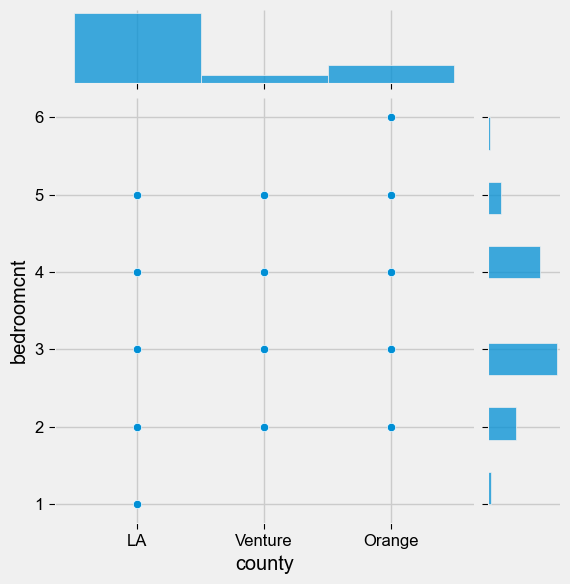

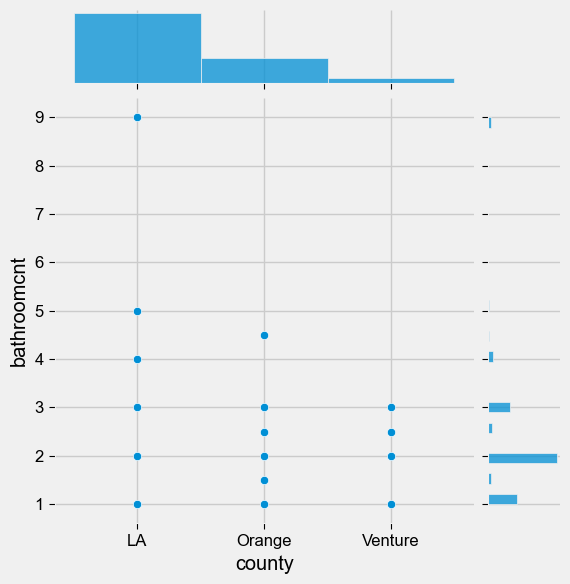

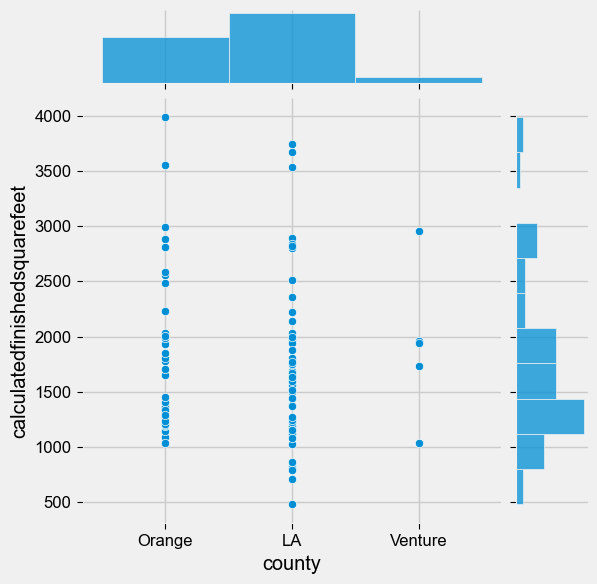

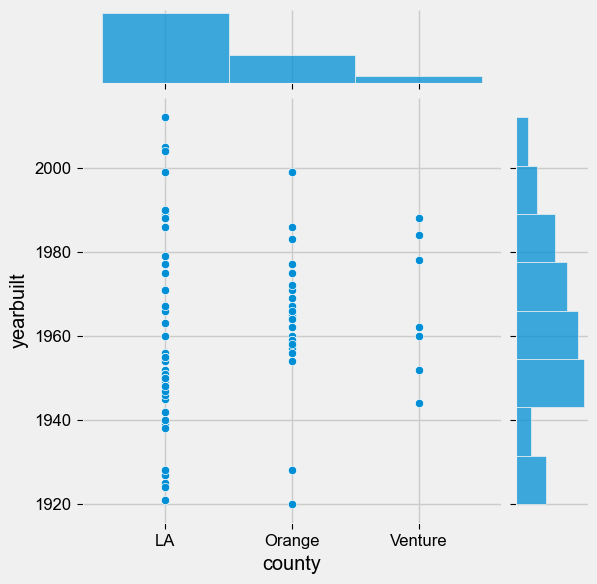

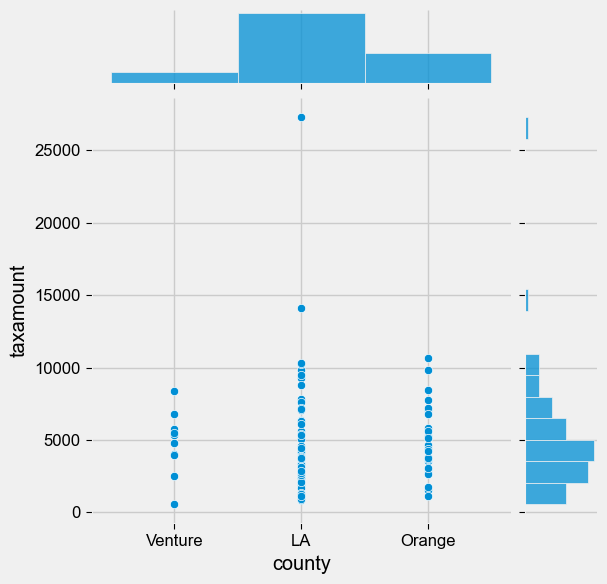

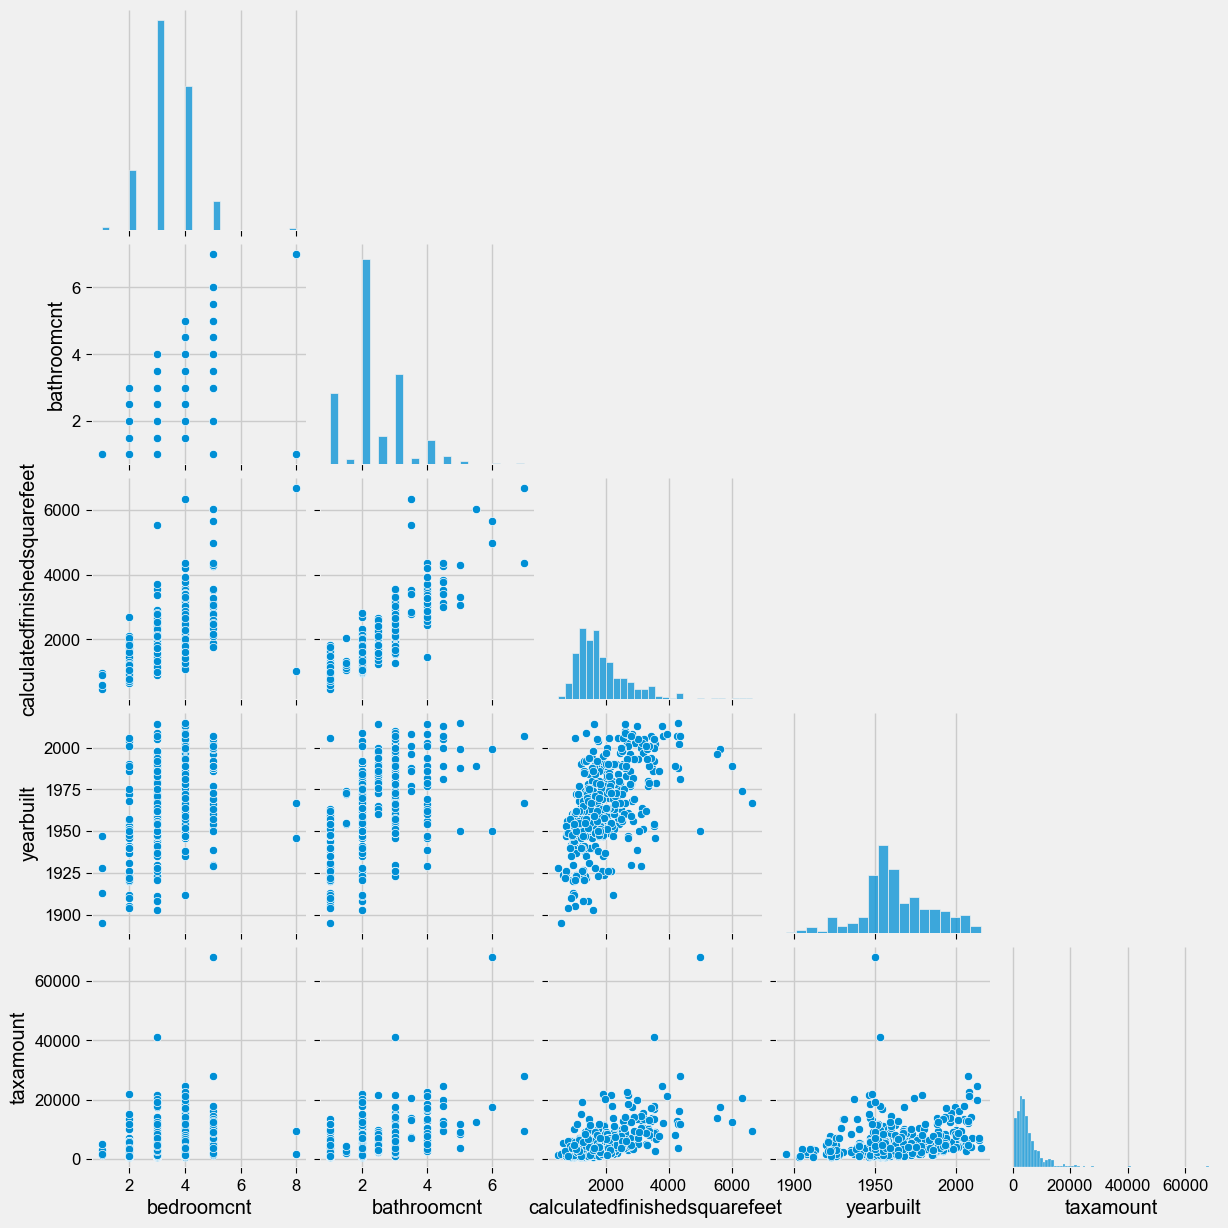

In [ ]:
cat_col, num_col = [], []
def plot_categorical_and_continuous_vars(train, cat=cat_col, num=num_col):
    cols = train[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount','county']]
    cat_col = []
    num_col = []
    for col in cols:
        if train[col].dtype == 'O':
            cat_col.append(col)
        else:
            if train[col].nunique() < 9:
                cat_col.append(col)
            else:
                num_col.append(col)

    for col in num_col:
        sns.jointplot(x=cat_col[0],y=col, data=train_sample)
        plt.show()
    return cat_col, num_col

cat_col, num_col = plot_categorical_and_continuous_vars(train)

    

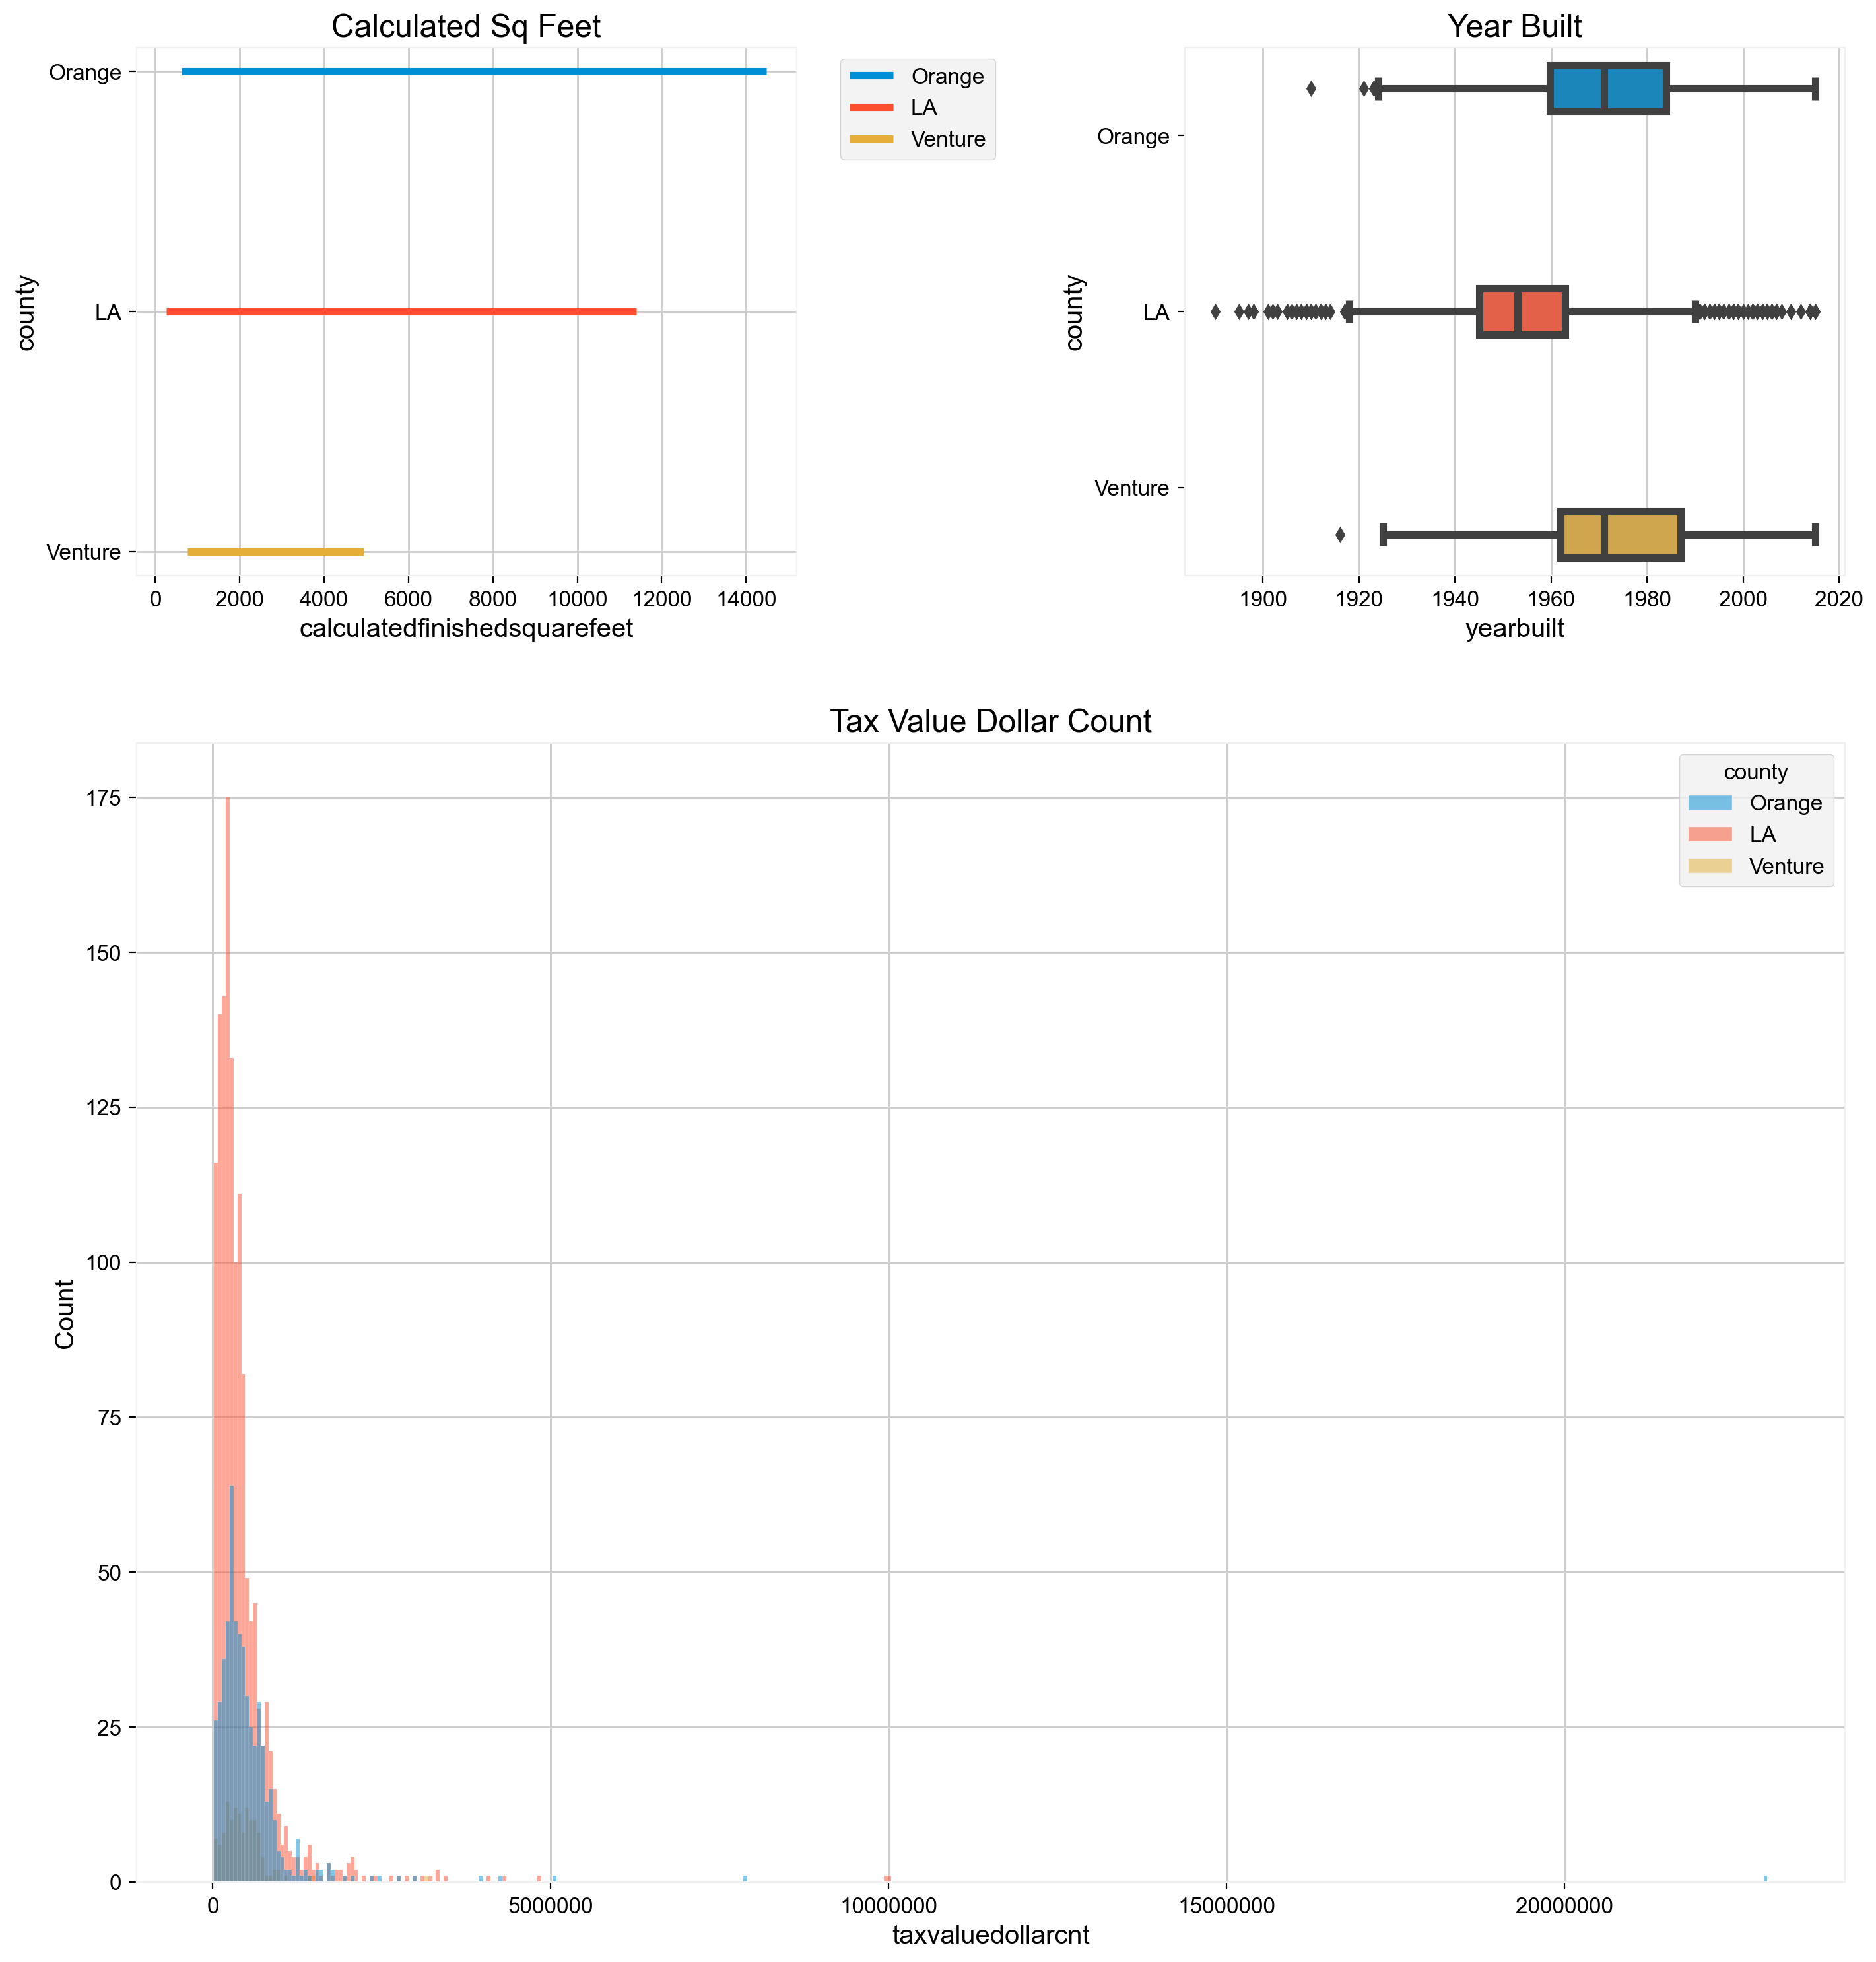

In [ ]:
ax1 = pw.Brick(figsize=(5,4))
sns.lineplot(x="calculatedfinishedsquarefeet", y=cat_col[0], hue="county", data=train_sample, ax=ax1)
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.set_title("Calculated Sq Feet")

ax2 = pw.Brick(figsize=(5,4))
sns.boxplot(x="yearbuilt",y=cat_col[0], hue='county',data=train_sample,ax=ax2)
ax2.legend([],[],frameon=False)
ax2.set_title('Year Built')

ax3 = pw.Brick(figsize=(3,2))
sns.histplot(x='taxvaluedollarcnt',data=train_sample,hue='county',ax=ax3)
ax3.set_title('Tax Value Dollar Count')
ax3.ticklabel_format(style='plain', axis='x')

#ax4 = pw.Brick(figsize=(3,2))
#sns.pairplot(train[num_col].sample(2000), corner=True)

ax12 = (ax1|ax2)/(ax3)
ax12

## 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

## 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

## 7. Come up with some initial hypotheses based on your goal of predicting property value.

## 8. Visualize all combinations of variables in some way.

## 9. Run the appropriate statistical tests where needed.

## 10. What independent variables are correlated with the dependent variable, home value?

## 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

## 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

## 13. Explore your dataset with any other visualizations you think will be helpful.